# 신경망

**신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 알아보자!**

In [3]:
# 다양한 활성화 함수 구현하기

#계단함수
def stepf(x):
  if x > 0:
    return 1
  else:
    return 0

#시그모이드 함수
import numpy as np

def sigmoidf(x):
  return 1 / (1+np.exp(-x))

#relu 함수
def reluf(x):
  return np.maximum(0,x)

#softmax함수
def softmaxf(x):
  exp_x = np.exp(x)
  sum_exp = np.sum(exp_x)
  y = exp_x / sum_exp
  return y



**신경망은 행렬의 연산으로 표현된다 따라서 행렬의 연산에 대해 간단히 알아보자**

- 입력 X의 크기 : 2

- 출력의 y의 크기 : 3

이라고 했을 때, w값은 총 6개가 필요하다.

In [ ]:
#위 조건을 만족하는 간단한 행렬 곱 예시
#행렬의 크기가 맞아야 한다!

X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
print(X.shape,W.shape)

(2,) (2, 3)


In [ ]:
y = np.dot(X,W)
print(y.shape)

(3,)


In [ ]:
# 입력 * 가중치 -> 출력을 나타내는 신경망의 구조 구현하기.

def init_network():
  network = {}
  network['W1'] = np.array([[1,3,5],[2,4,6]])
  network['b1'] = np.array([1,2,3])
  # 가중치 더 늘릴 수 있다.
  return network

def forward(network, x):
  W1 = network['W1']
  b1 = network['b1']

  #forward(행렬곱 + activation)
  a1 = np.dot(x,W1) + b1
  z1 = sigmoidf(a1)
  return z1

network = init_network()
x = np.array([13,5])
y = forward(network, x)
print(y.shape)

(3,)


## mnist dataset
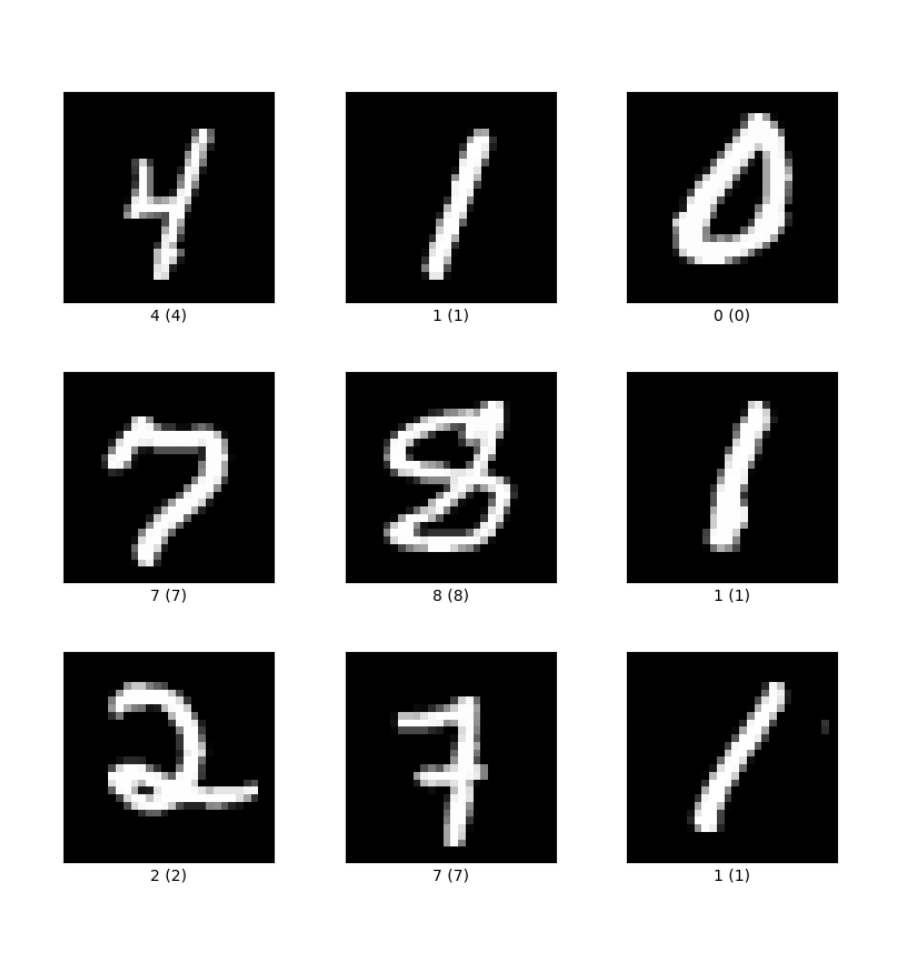


In [4]:
 # mnist dataset으로 신경망 추론처리
 # 28 * 28크기의 입력크기 / 10개의 예측값

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록
import numpy as np
import pickle
from keras.datasets import mnist


def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoidf(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoidf(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmaxf(a3)

    return y


In [ ]:
#배치처리 + test data로 추론하기

#가중치가 저장되어 있는 파일이 있어야 함. (init_network())
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))